<a href="https://colab.research.google.com/github/larhchim/Salary-Prediction-Classification-ML/blob/main/Projet_ML_LARHCHIM_EL_BIYAALI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from collections import Counter
from scipy.stats import shapiro
import scipy
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import graphviz
from sklearn import tree

Loading DataSet of Salary Prediction Classification

In [4]:
!pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import opendatasets as od
import pandas

In [7]:
od.download("https://www.kaggle.com/datasets/ayessa/salary-prediction-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: larhchimismail
Your Kaggle Key: ··········


100%|██████████| 460k/460k [00:00<00:00, 61.4MB/s]

In [8]:
# reading the CSV file
csvFile = pandas.read_csv('./salary-prediction-classification/salary.csv',)
 
# displaying the contents of the CSV file
print(csvFile)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [9]:
df = pd.read_csv("./salary-prediction-classification/salary.csv")

In [10]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [13]:
df.head(2).transpose()

,0,1
age,39,50
workclass,State-gov,Self-emp-not-inc
fnlwgt,77516,83311
education,Bachelors,Bachelors
education-num,13,13
marital-status,Never-married,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial
relationship,Not-in-family,Husband
race,White,White
sex,Male,Male



**Find missing values**

In [14]:
df.isnull().mean()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
#some statistical information about data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Cleaning the Data

Remove duplicate rows




In [18]:
counts = df.nunique()
counts

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [19]:
#check Duplicates
df.duplicated().sum()

24

In [20]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [21]:
pd.DataFrame({'h': df.nunique().index , 'null':  df.isnull().sum()})

,h,null
age,age,0
workclass,workclass,0
fnlwgt,fnlwgt,0
education,education,0
education-num,education-num,0
marital-status,marital-status,0
occupation,occupation,0
relationship,relationship,0
race,race,0
sex,sex,0


In [22]:
#Removing spaces from objects data types
df['workclass'] = df['workclass'].str.strip()
df['education'] = df['education'].str.strip()
df['marital-status'] = df['marital-status'].str.strip()
df['occupation'] = df['occupation'].str.strip()
df['relationship'] = df['relationship'].str.strip()
df['race'] = df['race'].str.strip()
df['sex'] = df['sex'].str.strip()
df['native-country'] = df['native-country'].str.strip()
df['salary'] = df['salary'].str.strip()

Remove Missing Data 

In [23]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [24]:
categorical_types = ['O']
categorical_columns = df.select_dtypes(include=categorical_types).columns.tolist()
categorical_columns.remove('salary')
for cat_col in categorical_columns:
    print("=========================")
    print(cat_col)
    print(f"{df[cat_col].value_counts()}\n")

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

marital-status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

occupation
Prof-specialty       4136
Craft-repair         4094
E

In [25]:
df["workclass"].describe()

count       32537
unique          9
top       Private
freq        22673
Name: workclass, dtype: object

In [26]:
df['workclass'] = df['workclass'].replace("?", np.nan)
df["workclass"].isnull().sum()

1836

In [27]:
df['native-country'] = df['native-country'].replace("?", np.nan)
df["native-country"].isnull().values.any()

True

In [28]:
df['occupation'] = df['occupation'].replace('?', np.nan)
df["occupation"].isnull().sum()

1843

In [29]:
df.isnull().mean()

age               0.000000
workclass         0.056428
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056643
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017887
salary            0.000000
dtype: float64

In [30]:
# Fill NaN values by MODE

df['workclass'].fillna(df['workclass'].mode()[0] , axis=0 ,inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0] , axis=0 ,inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0] , axis=0 ,inplace=True)

In [31]:
#Check if df contains null values 
df.isnull().mean()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [32]:
#formatting [sex] column 
df['sex']= df['sex'].map({'Female': 0, 'Male': 1})
df['sex'].value_counts()

1    21775
0    10762
Name: sex, dtype: int64

In [33]:
#formatting the target column
df['salary']= df['salary'].map({'<=50K': 0, '>50K': 1})
df['salary'].value_counts()

0    24698
1     7839
Name: salary, dtype: int64

In [34]:
df['education-num'].value_counts()

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education-num, dtype: int64

In [35]:
# Formating [ marital-status ] column
df['marital-status'] =  df['marital-status'].replace(['Married-civ-spouse' , 'Married-spouse-absent' , 'Married-AF-spouse' ] , 1)
df['marital-status'] =  df['marital-status'].replace(['Divorced' , 'Separated' , 'Widowed' ] , 0)
df['marital-status'] =  df['marital-status'].replace(['Never-married'] , -1)

In [36]:
df['marital-status'].value_counts()

 1    15411
-1    10667
 0     6459
Name: marital-status, dtype: int64

In [37]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,-1,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


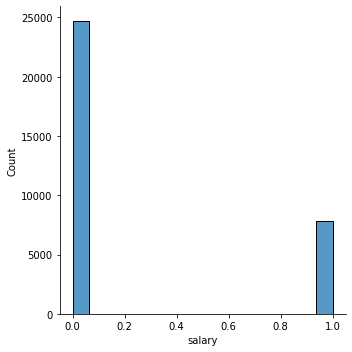

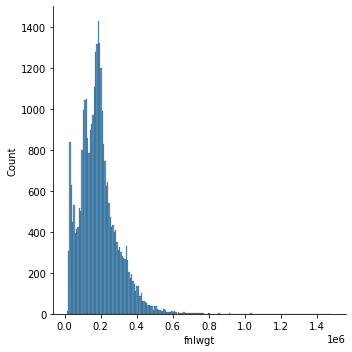

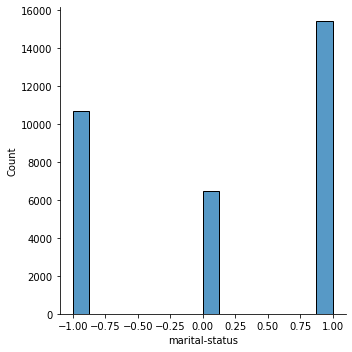

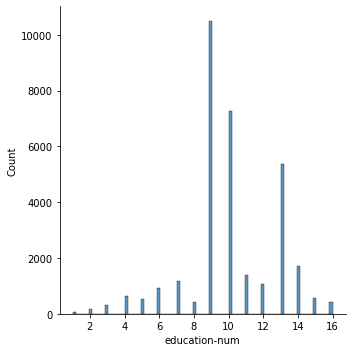

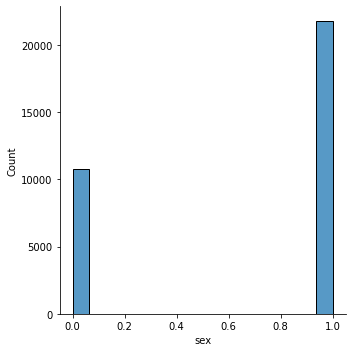

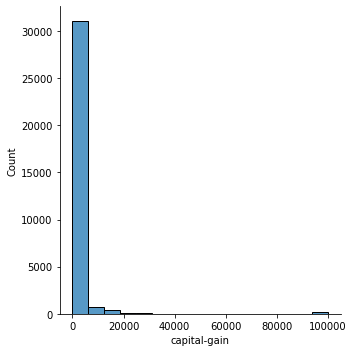

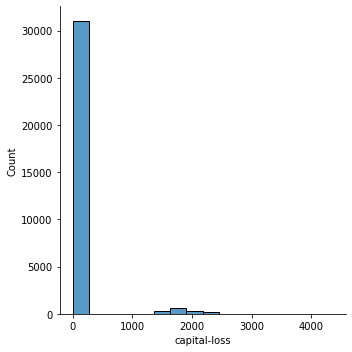

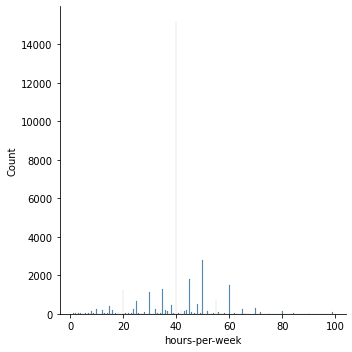

In [38]:
sns.displot(x="salary",data=df)
sns.displot(x="fnlwgt",data=df)
sns.displot(x="marital-status",data=df)
sns.displot(x="education-num",data=df)
sns.displot(x="sex",data=df)
sns.displot(x="capital-gain",data=df)
sns.displot(x="capital-loss",data=df)
sns.displot(x="hours-per-week",data=df)

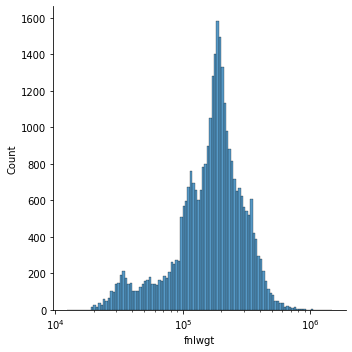

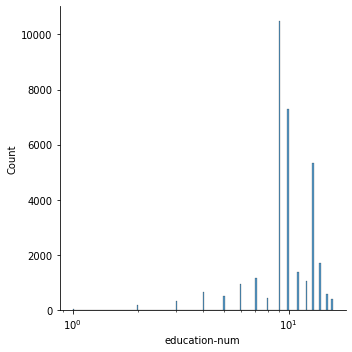

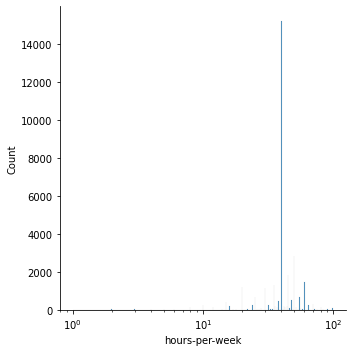

In [39]:
sns.displot(x="fnlwgt",data=df,log_scale=True)
sns.displot(x="education-num",data=df,log_scale=True)
sns.displot(x="hours-per-week",data=df,log_scale=True)

**Dispersion, Correlation**

In [71]:
numerical = df[["salary","age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]].copy()
numerical = numerical.dropna()

In [72]:
numerical.mad()

salary                0.365761
age                  11.187904
fnlwgt            77607.506313
education-num         1.903119
capital-gain       1978.703388
capital-loss        166.578828
hours-per-week        7.584314
dtype: float64

In [73]:
numerical.mean()

salary                 0.240926
age                   38.585549
fnlwgt            189780.848511
education-num         10.081815
capital-gain        1078.443741
capital-loss          87.368227
hours-per-week        40.440329
dtype: float64

In [74]:
numerical.var()

salary            1.828861e-01
age               1.859946e+02
fnlwgt            1.114217e+10
education-num     6.613296e+00
capital-gain      5.458191e+07
capital-loss      1.624911e+05
hours-per-week    1.524457e+02
dtype: float64

In [75]:
numerical.cov()

,salary,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,0.182886,1.364977,-4.289496e+02,0.368719,7.056258e+02,25.944414,1.212634
age,1.364977,185.994594,-1.100517e+05,1.270447,7.826382e+03,317.454068,11.536939
fnlwgt,-428.949578,-110051.688494,1.114217e+10,-11777.880524,3.342341e+05,-436568.823027,-24629.699183
education-num,0.368719,1.270447,-1.177788e+04,6.613296,2.330502e+03,82.818379,4.712652
capital-gain,705.625846,7826.382249,3.342341e+05,2330.502298,5.458191e+07,-94224.613427,7152.207079
capital-loss,25.944414,317.454068,-4.365688e+05,82.818379,-9.422461e+04,162491.087819,269.901814
hours-per-week,1.212634,11.536939,-2.462970e+04,4.712652,7.152207e+03,269.901814,152.445672


In [76]:
numerical.corr()

,salary,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,1.000000,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658
age,0.234037,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.009502,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.335272,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.223336,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.150501,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.229658,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


### Checking correlation/covariance relation

We check that the person correlation is indeed the covariance divided by the square root of the product of variance

In [77]:
covariance = numerical.cov()
covariance["salary"].loc["education-num"]/np.sqrt(numerical.var()["salary"]*numerical.var()["education-num"])

0.3352715122489292

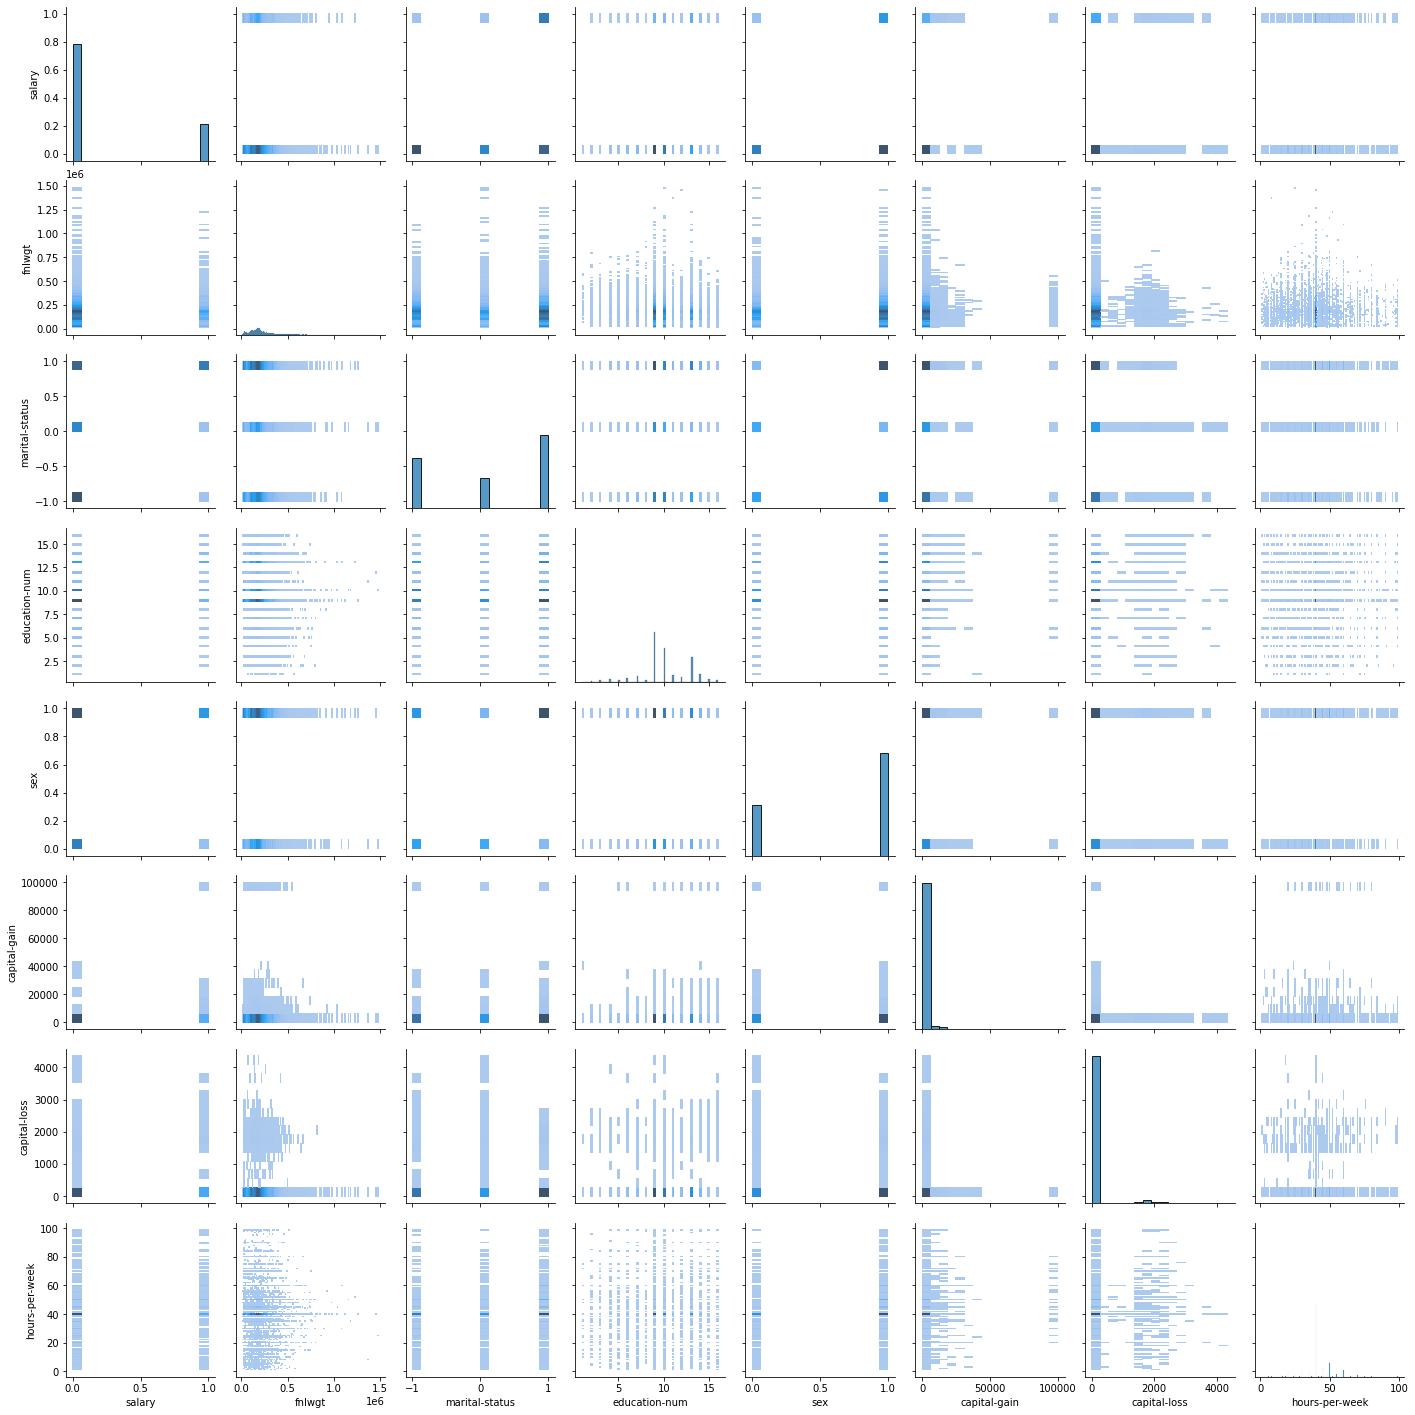

In [47]:
sns.pairplot(numerical, kind="hist")

In [78]:
numerical.corr(method="spearman")

,salary,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,1.000000,0.272896,-0.010798,0.329787,0.278152,0.141015,0.269071
age,0.272896,1.000000,-0.077917,0.066199,0.124905,0.058433,0.142763
fnlwgt,-0.010798,-0.077917,1.000000,-0.035828,-0.006032,-0.006910,-0.021882
education-num,0.329787,0.066199,-0.035828,1.000000,0.119126,0.074730,0.167465
capital-gain,0.278152,0.124905,-0.006032,0.119126,1.000000,-0.066622,0.093316
capital-loss,0.141015,0.058433,-0.006910,0.074730,-0.066622,1.000000,0.059842
hours-per-week,0.269071,0.142763,-0.021882,0.167465,0.093316,0.059842,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd9bd8c310>,
      dtype=object)

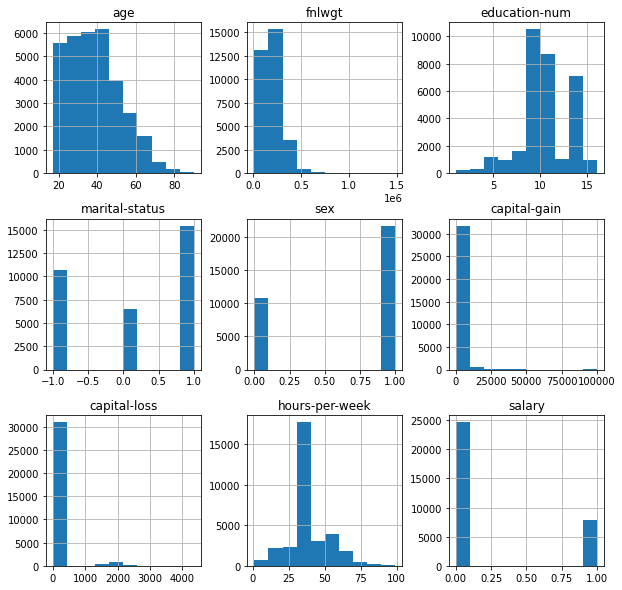

In [79]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']
numerical_columns = df.select_dtypes(include=numeric_types).columns.tolist()
pd.DataFrame(df[numerical_columns]).hist(figsize=(10,10))

In [80]:
df[numerical_columns].describe()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,0.145803,0.669238,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,0.883319,0.470495,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,-1.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,1.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.DataFrame(
    StandardScaler().fit_transform(df[numerical_columns]),
    columns=numerical_columns
).describe()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary
count,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04
mean,-7.555945e-17,-1.255685e-16,2.849858e-17,4.018190e-17,7.130104e-17,3.646945e-17,4.367598e-19,-6.485884e-17,-4.367598e-19
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582777e+00,-1.681551e+00,-3.531590e+00,-1.297176e+00,-1.422436e+00,-1.459754e-01,-2.167432e-01,-3.194403e+00,-5.633774e-01
25%,-7.761933e-01,-6.816726e-01,-4.206787e-01,-1.297176e+00,-1.422436e+00,-1.459754e-01,-2.167432e-01,-3.566374e-02,-5.633774e-01
50%,-1.162616e-01,-1.082361e-01,-3.181473e-02,-1.650654e-01,7.030196e-01,-1.459754e-01,-2.167432e-01,-3.566374e-02,-5.633774e-01
75%,6.903217e-01,4.472760e-01,7.459132e-01,9.670455e-01,7.030196e-01,-1.459754e-01,-2.167432e-01,3.693028e-01,-5.633774e-01
max,3.770003e+00,1.226778e+01,2.301369e+00,9.670455e-01,7.030196e-01,1.338964e+01,1.058963e+01,4.742941e+00,1.775009e+00


In [83]:
pd.DataFrame(
    MinMaxScaler().fit_transform(df[numerical_columns]),
    columns=numerical_columns
).describe()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,0.295692,0.120547,0.605454,0.572902,0.669238,0.010785,0.020057,0.402452,0.240926
std,0.186822,0.071689,0.171442,0.441660,0.470495,0.073880,0.092539,0.125989,0.427652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.000000,0.000000,0.397959,0.000000
50%,0.273973,0.112788,0.600000,0.500000,1.000000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,0.152611,0.733333,1.000000,1.000000,0.000000,0.000000,0.448980,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Salaries ratio for all persons')

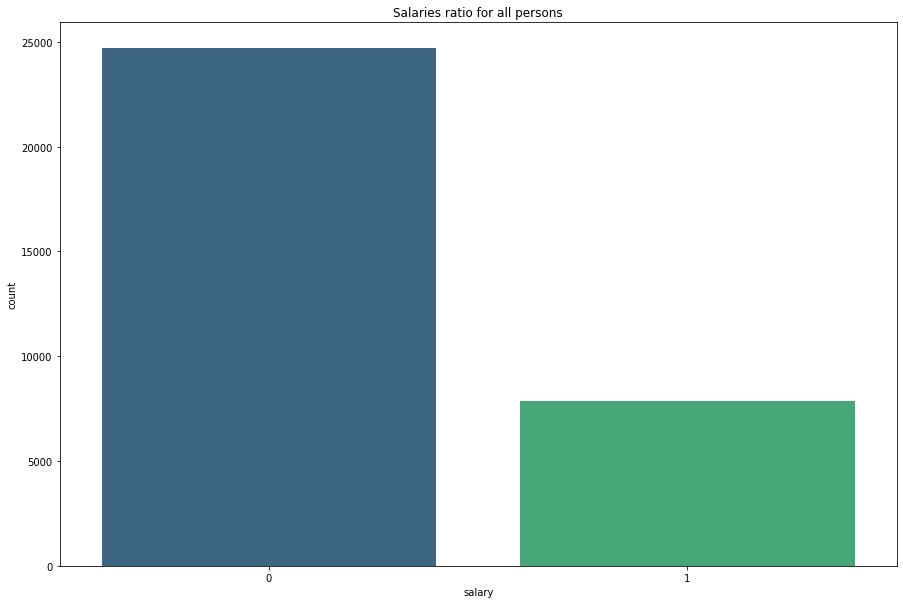

In [91]:
plt.figure(figsize=(15,10))
ax = sns.countplot( x=df.salary , data= df , palette='viridis')
ax.set_title('Salaries ratio for all persons')


Text(0.5, 1.0, 'Salaries ratio for Male/Female')

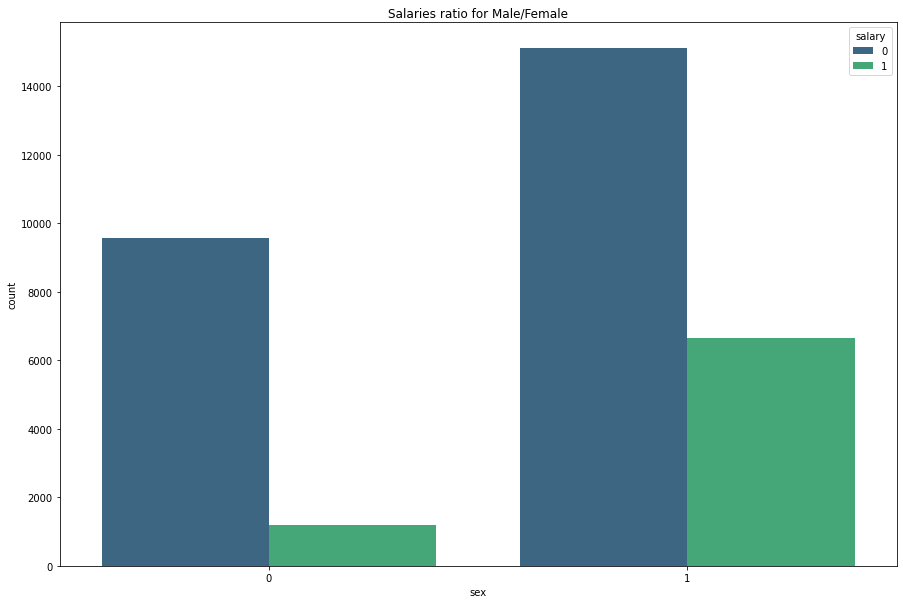

In [92]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='sex', hue='salary', palette='viridis').set_title('Salaries ratio for Male/Female')

In [93]:
df[df['sex']==1].salary.value_counts(normalize=True).mul(100).round(0).astype(str) + ' %'

0    69.0 %
1    31.0 %
Name: salary, dtype: object

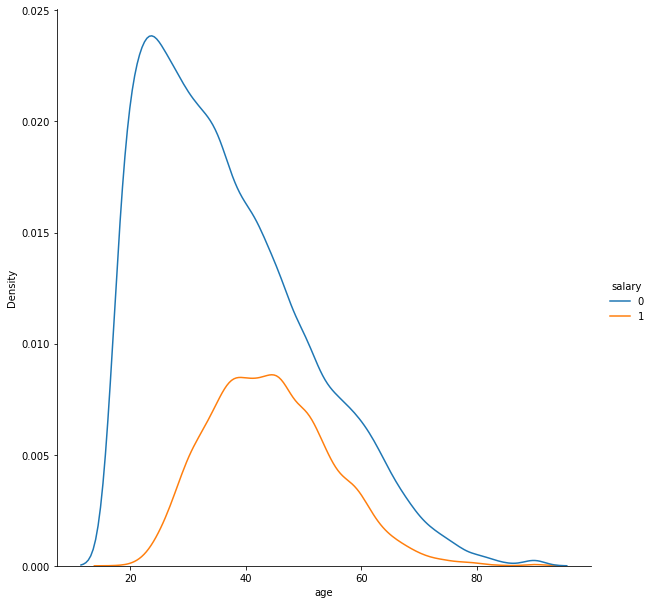

In [94]:
sns.displot(data=df, x="age", hue="salary", kind="kde", height=8.5, aspect=1)

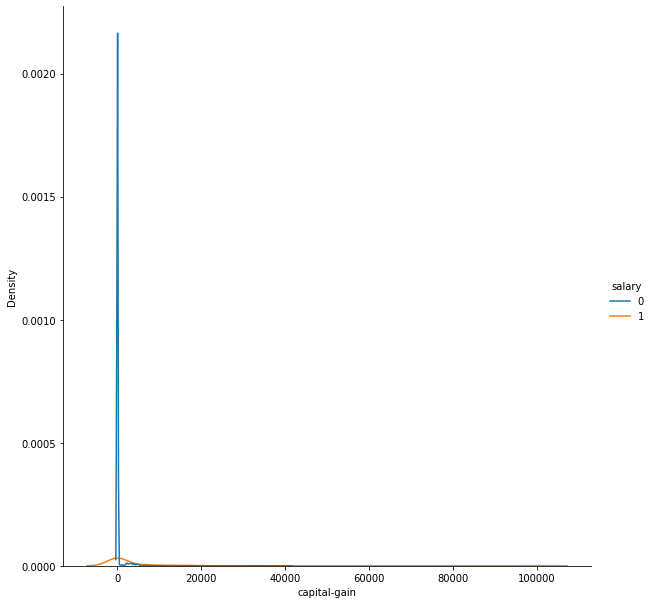

In [95]:
sns.displot(data=df, x="capital-gain", hue="salary", kind="kde", height=8.5, aspect=1)

In [96]:
df.drop('capital-gain', inplace=True, axis=1)

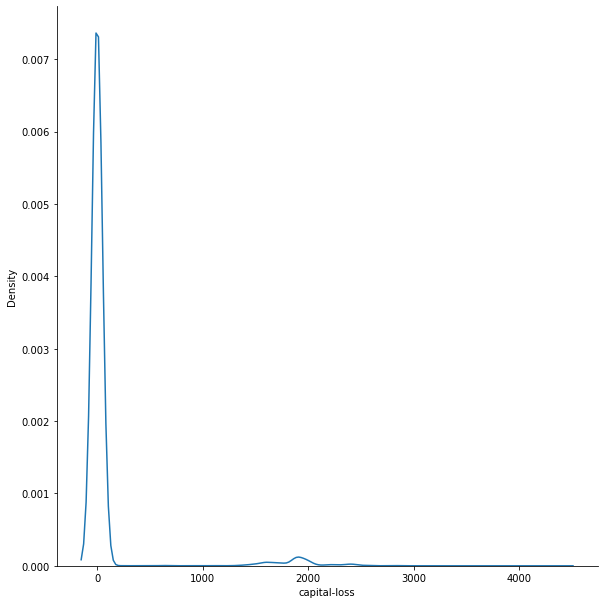

In [97]:
sns.displot(data=df, x="capital-loss", kind="kde", height=8.5, aspect=1)

In [98]:
df.drop('capital-loss', inplace=True, axis=1)

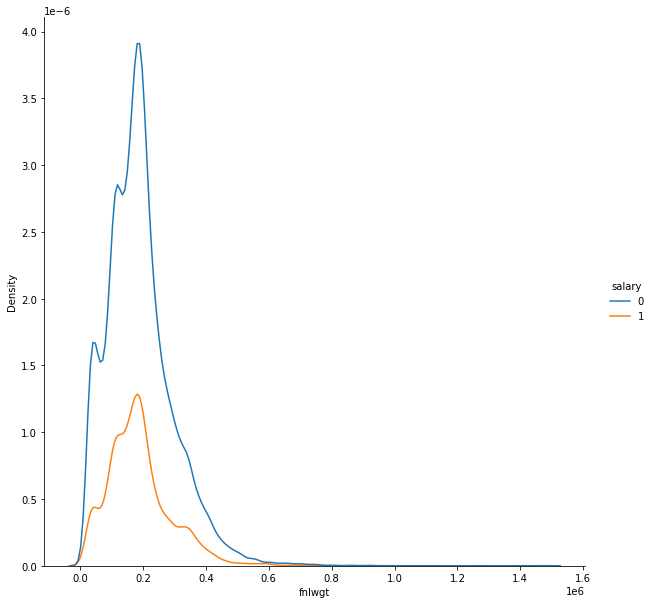

In [99]:
sns.displot(data=df, x="fnlwgt", hue="salary", kind="kde", height=8.5, aspect=1)

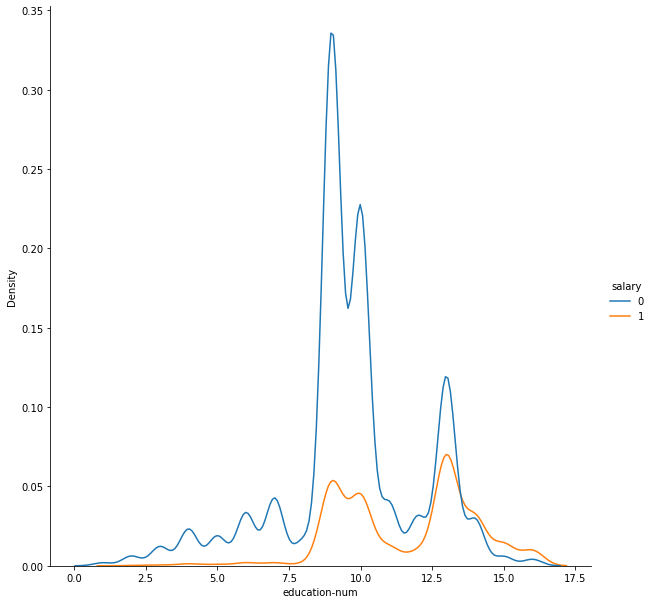

In [100]:
sns.displot(data=df, x="education-num", hue="salary", kind="kde", height=8.5, aspect=1)

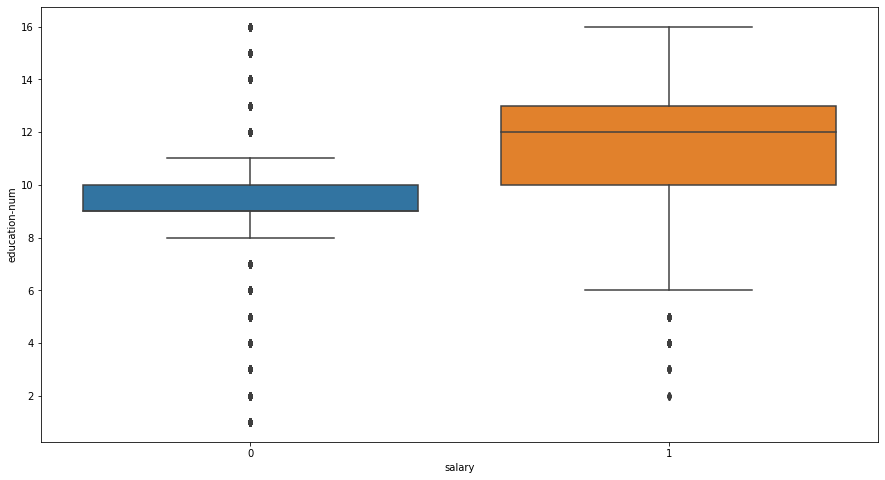

In [101]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, y="education-num", x="salary")

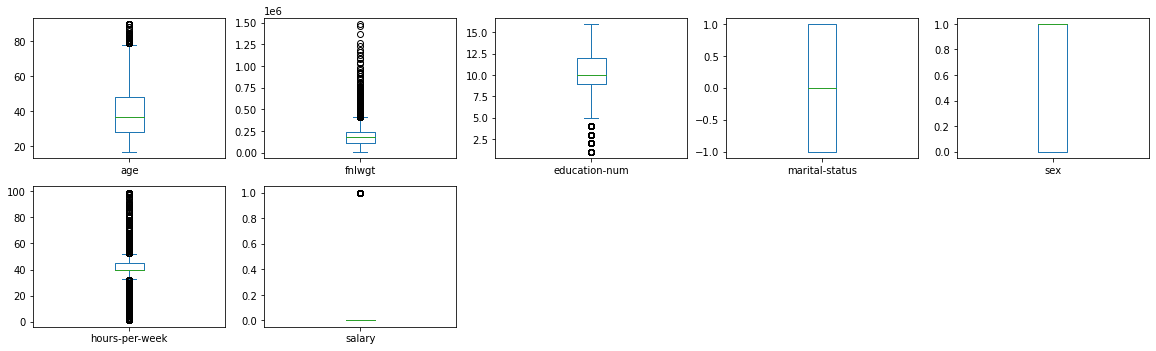

In [102]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

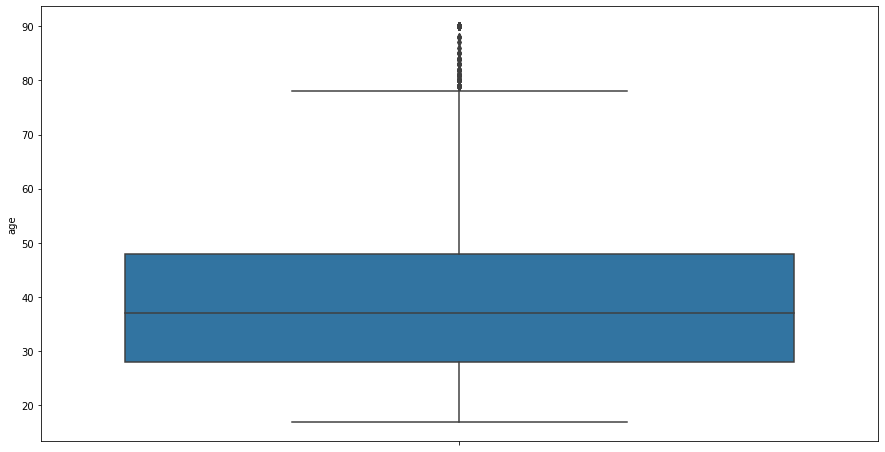

In [103]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, y="age")

In [104]:
outAge = df[df['age'] > 61]
outAge.shape #get number of rows with outliers (Q3 + 1.5(Q3 - Q1))

(2031, 13)

In [105]:
df.drop(outAge.index, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


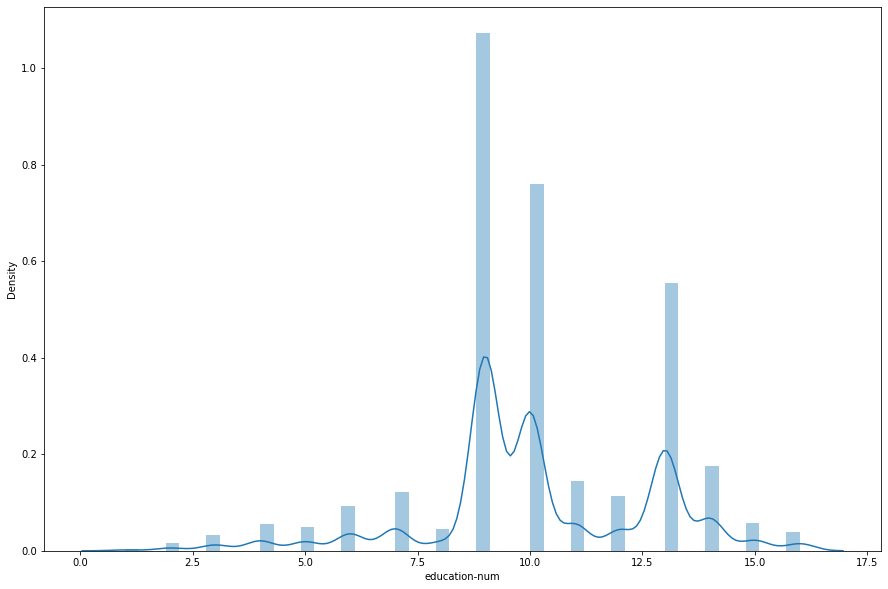

In [106]:
plt.figure(figsize=(15,10))
sns.distplot(df['education-num'])
plt.show()

In [107]:
outEdu = df[df['education-num'] < 3.5]
outEdu.shape #get number of rows with outliers (Q1 - 1.5(Q3 - Q1))

(474, 13)

In [108]:
df.drop(outEdu.index, inplace = True)

In [109]:
# Formating [ education-num ] column
df['education-num'] =  df['education-num'].replace(range(1,9) , 0) #Compulsory (Preschool:Grade12)
df['education-num'] =  df['education-num'].replace(9 , 1) #Highschool-Graduate
df['education-num'] =  df['education-num'].replace([10,13],2) #Bachelor or SomeCollege
df['education-num'] =  df['education-num'].replace([11,12],3) #Assoc-voc or Assoc-acdm
df['education-num'] =  df['education-num'].replace(13,4) #Masters
df['education-num'] =  df['education-num'].replace(14,5) #Prof-school
df['education-num'] =  df['education-num'].replace(15,6) #Doctrate

In [110]:
df['education-num'].value_counts()

2     12041
1      9819
0      3326
3      2354
5      1614
6       521
16      357
Name: education-num, dtype: int64

In [113]:
le = LabelEncoder()

In [114]:
for i in df.columns:
    if (df[i].dtypes== 'object') :
        df[i] = le.fit_transform(df[i])

In [115]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [116]:
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [117]:
import plotly.express as px
fig = px.pie(values=y_resampled.value_counts(), width=800, height=400, title="Data Balance")
fig.show()

In [123]:
clf = RandomForestClassifier()

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=44 )

First predictions: **linear** 

In [134]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
def print_errors(y_true,prediction):
    print("MSE",mean_squared_error(y_true,prediction,squared=True))
    print("RMSE",mean_squared_error(y_true,prediction,squared=False))
    print("MAE",mean_absolute_error(y_true,prediction))
    print("R2",r2_score(y_true,prediction))
    

In [137]:
print_errors(y_train,lr.predict(X_train))

MSE 0.16088989154900726
RMSE 0.40111082202928316
MAE 0.34089147575963613
R2 0.3564252814081921


In [138]:
print_errors(y_test,lr.predict(X_test))

MSE 0.15981098404577404
RMSE 0.39976366023661286
MAE 0.3405163565889325
R2 0.3605151661677739


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



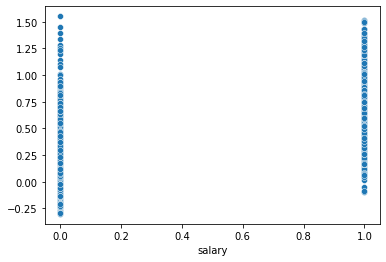

In [139]:
sns.scatterplot(y_test,lr.predict(X_test))

In [140]:
print([(numerical_X.columns[i],lr.coef_[i]) for i in range(len(numerical_X.columns))])
print(lr.intercept_)

NameError: ignored

In [126]:
model = clf.fit(X_train, y_train)

In [127]:
y_pred = model.predict(X_test)

In [128]:
print("Accuracy on Test Data : {:,.2f}".format(clf.score(X_test , y_test) *100 ) , '%')

Accuracy on Test Data : 87.48 %


In [129]:
print(accuracy_score(y_pred, y_test))

0.8748345831495369


In [130]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4446
           1       0.88      0.88      0.88      4622

    accuracy                           0.87      9068
   macro avg       0.87      0.87      0.87      9068
weighted avg       0.87      0.87      0.87      9068

